In [26]:
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572) 
  
# data (as pandas dataframes) 
X = taiwanese_bankruptcy_prediction.data.features 
y = taiwanese_bankruptcy_prediction.data.targets 
  
# metadata 
print(taiwanese_bankruptcy_prediction.metadata) 
  
# variable information 
print(taiwanese_bankruptcy_prediction.variables) 



{'uci_id': 572, 'name': 'Taiwanese Bankruptcy Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction', 'data_url': 'https://archive.ics.uci.edu/static/public/572/data.csv', 'abstract': 'The data were collected from the Taiwan Economic Journal  for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 6819, 'num_features': 95, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Bankrupt?'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5004D', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': No

In [27]:
y.value_counts()

Bankrupt?
0            6599
1             220
Name: count, dtype: int64

In [28]:
X.head()



,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [29]:
# Import Module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

# Fit the data to the model
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Count distinct resampled values
y_resampled.value_counts()

Bankrupt?
0            168
1            168
Name: count, dtype: int64

In [30]:


# Import `LogisticRegression` from sklearn
from sklearn.linear_model import LogisticRegression

# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression()

logistic_regression_model_undersampled = LogisticRegression()

# Fit the model
logistic_regression_model.fit(X_train, y_train)

logistic_regression_model_undersampled.fit(X_resampled, y_resampled)

c:\Users\jieja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jieja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jieja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

LogisticRegression()

In [31]:
y_pred_resampled = logistic_regression_model_undersampled.predict(X_test)

In [32]:
# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)}")

Training Data Score: 0.9614782948768088
Testing Data Score: 0.9624633431085043


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score

# Make predictions on the test data
predictions = logistic_regression_model.predict(X)

# Create a confusion matrix
print(confusion_matrix(y, predictions, labels = [1,0]))

[[   4  216]
 [  45 6554]]


In [34]:
# Create a classification report
print(classification_report(y, predictions, labels = [1, 0]))

              precision    recall  f1-score   support

           1       0.08      0.02      0.03       220
           0       0.97      0.99      0.98      6599

    accuracy                           0.96      6819
   macro avg       0.52      0.51      0.51      6819
weighted avg       0.94      0.96      0.95      6819



In [57]:
# Calculate the balanced accuracy score
# print(balanced_accuracy_score(y, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [6819, 1705]

In [37]:
# 1- Run each selected model with the data as is to see qhich one has the highest accuracy (make  a Pipeline to re-do each model and analyze it)
# 2- Once you choose a model, run oversampling and undersampling  because the data set is unblanced
# 3- Explain the confusion matrix for each


# Logistic Regression (Ghalia)
# SVM                 (Andrew)
# Random Forest ***    (Parra)
# KNN                  (Syed)
# Decision Trees   (Jie)


In [58]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [59]:
# Load data
df = pd.read_csv('data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [60]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

In [61]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [62]:

predictions = model.predict(X_test)
acc_score = accuracy_score(y_test, predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9501466275659824


In [64]:
# Calculate the balanced accuracy score using the test set
print(balanced_accuracy_score(y_test, predictions))


0.6498283189916881


Note: you may need to restart the kernel to use updated packages.


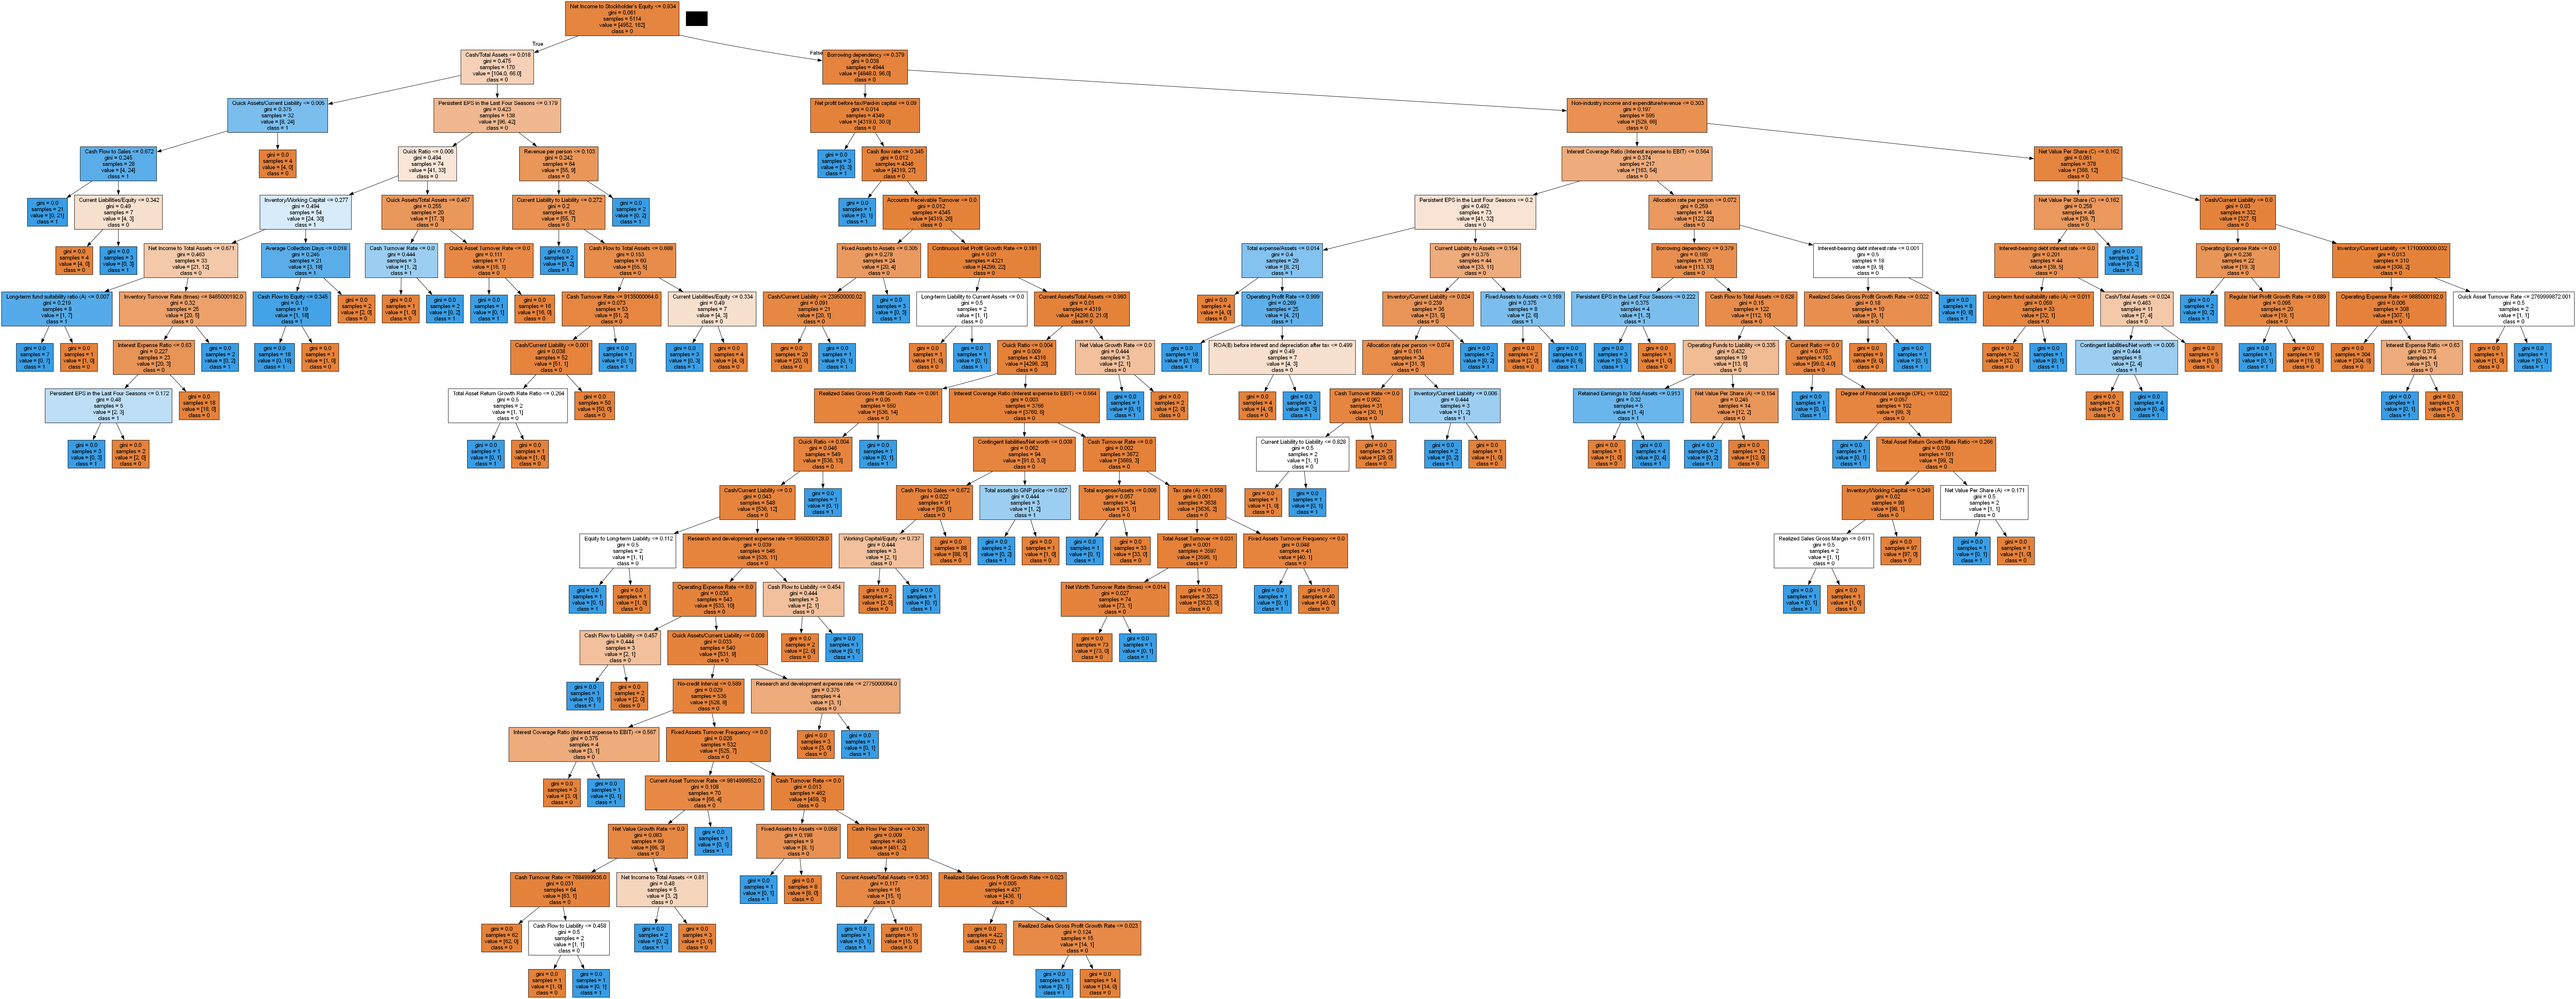

In [54]:
from IPython.display import Image
import pydotplus
%pip install graphviz

# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [24]:
# Save the tree as PNG
file_path = "taiwanese_bankruptcy_prediction.png"
graph.write_png(file_path)

True